In [2]:
FOLDER = "./data/frota"
PREFIX = "frota_"
SUFFIX = ""
EXTENSION = "xls"

FILES = []
for i in range (2004, 2025):
    FILES.append(
        {
            "year": i,
            "path": f'{FOLDER}/{PREFIX}{i}{SUFFIX}.{EXTENSION}'
        }
    )

FILES

[{'year': 2004, 'path': './data/frota_2004.xls'},
 {'year': 2005, 'path': './data/frota_2005.xls'},
 {'year': 2006, 'path': './data/frota_2006.xls'},
 {'year': 2007, 'path': './data/frota_2007.xls'},
 {'year': 2008, 'path': './data/frota_2008.xls'},
 {'year': 2009, 'path': './data/frota_2009.xls'},
 {'year': 2010, 'path': './data/frota_2010.xls'},
 {'year': 2011, 'path': './data/frota_2011.xls'},
 {'year': 2012, 'path': './data/frota_2012.xls'},
 {'year': 2013, 'path': './data/frota_2013.xls'},
 {'year': 2014, 'path': './data/frota_2014.xls'},
 {'year': 2015, 'path': './data/frota_2015.xls'},
 {'year': 2016, 'path': './data/frota_2016.xls'},
 {'year': 2017, 'path': './data/frota_2017.xls'},
 {'year': 2018, 'path': './data/frota_2018.xls'},
 {'year': 2019, 'path': './data/frota_2019.xls'},
 {'year': 2020, 'path': './data/frota_2020.xls'},
 {'year': 2021, 'path': './data/frota_2021.xls'},
 {'year': 2022, 'path': './data/frota_2022.xls'},
 {'year': 2023, 'path': './data/frota_2023.xls'},


In [3]:
import pandas as pd

all_data = []
previous = []

for file in FILES:
    print(file['year'])
    
    excel_file = pd.ExcelFile(file['path'])
    data = pd.read_excel(file['path'], sheet_name=excel_file.sheet_names[-1], skiprows=3, header=0)

    data.columns = (
        data.columns.str.normalize('NFKD')  # Decompose unicode characters
        .str.encode('ascii', errors='ignore')  # Remove non-ASCII characters
        .str.decode('utf-8')  # Decode back to UTF-8
        .str.strip()  # Remove leading/trailing spaces
        .str.lower()  # Convert to lowercase
    )

    data['ano'] = file['year']

    all_data.append(data)

df = pd.concat(all_data)
print(df.columns)
df.head()

2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
Index(['uf', 'municipio', 'total', 'automovel', 'bonde', 'caminhao',
       'caminhao trator', 'caminhonete', 'camioneta', 'chassi plataf',
       'ciclomotor', 'micro-onibus', 'motocicleta', 'motoneta', 'onibus',
       'quadriciclo', 'reboque', 'semi-reboque', 'side-car', 'outros',
       'trator esteira', 'trator rodas', 'triciclo', 'utilitario', 'ano'],
      dtype='object')


,uf,municipio,total,automovel,bonde,caminhao,caminhao trator,caminhonete,camioneta,chassi plataf,...,quadriciclo,reboque,semi-reboque,side-car,outros,trator esteira,trator rodas,triciclo,utilitario,ano
0,AC,ACRELANDIA,673.0,126.0,0.0,48.0,4.0,21.0,63.0,0.0,...,0.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,2004
1,AC,ASSIS BRASIL,126.0,32.0,0.0,10.0,0.0,3.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2004
2,AC,BRASILEIA,1348.0,304.0,0.0,83.0,10.0,43.0,104.0,0.0,...,0.0,9.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,2004
3,AC,BUJARI,195.0,66.0,0.0,29.0,1.0,8.0,18.0,0.0,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2004
4,AC,CAPIXABA,148.0,47.0,0.0,12.0,1.0,9.0,18.0,0.0,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2004


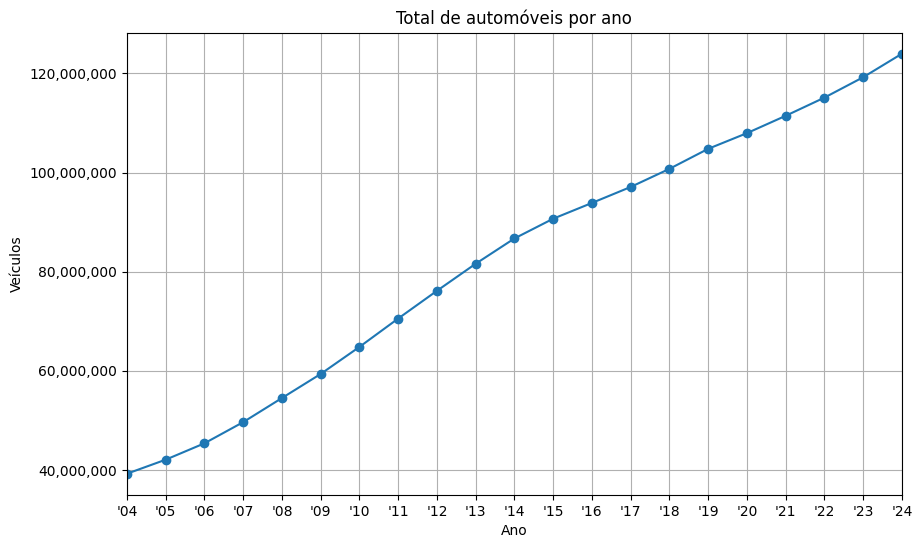

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator

# Data processing
df_group_total = df.groupby('ano')['total'].sum().reset_index()

# Init plot
plt.figure(figsize=(10, 6))  

# Plot
plt.plot(df_group_total['ano'], df_group_total['total'], marker='o', linestyle='-')

# Title and labels
plt.title('Total de automóveis por ano') 
plt.xlabel('Ano') 
plt.ylabel('Veículos') 

# Axis
plt.grid(True) 
plt.xlim(df['ano'].min(), df['ano'].max())
plt.gca().xaxis.set_major_locator(MaxNLocator(df['ano'].max() - df['ano'].min()))
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"'{int(x) % 100:02d}"))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Display
plt.show()


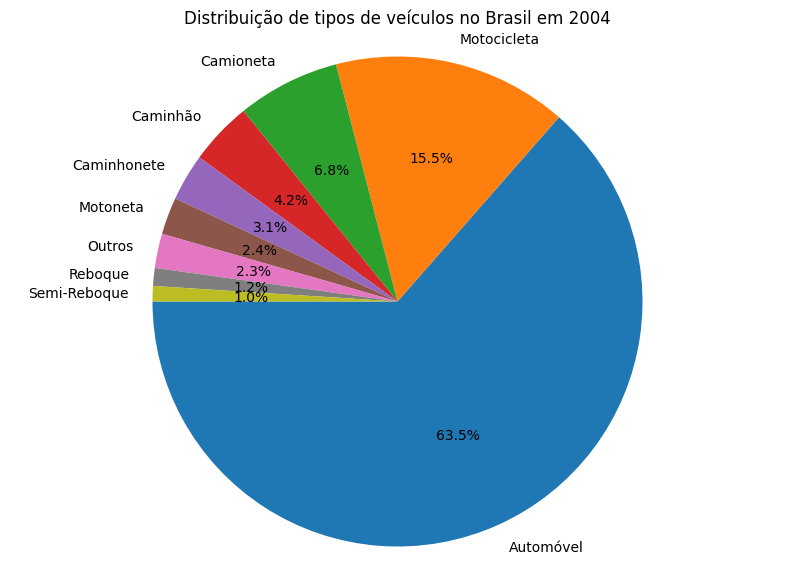

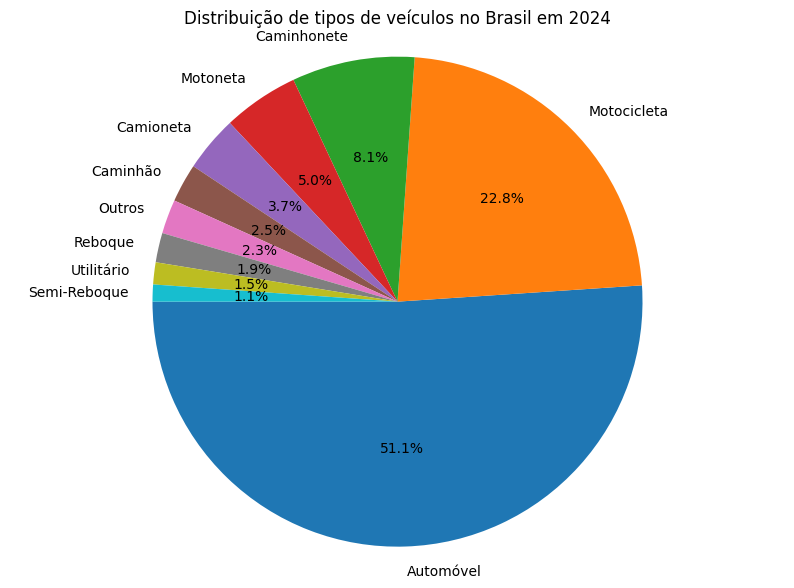

In [44]:
import matplotlib.pyplot as plt

TYPES = {
    'automovel': 'Automóvel',
    'bonde': 'Bonde',
    'caminhao': 'Caminhão',
    'caminhao trator': 'Caminhão Trator',
    'caminhonete': 'Caminhonete',
    'camioneta': 'Camioneta',
    'chassi plataf': 'Chassi Plataforma',
    'ciclomotor': 'Ciclomotor',
    'micro-onibus': 'Micro-Ônibus',
    'motocicleta': 'Motocicleta',
    'motoneta': 'Motoneta',
    'onibus': 'Ônibus',
    'quadriciclo': 'Quadriciclo',
    'reboque': 'Reboque',
    'semi-reboque': 'Semi-Reboque',
    'side-car': 'Side-Car',
    'outros': 'Outros',
    'trator esteira': 'Trator Esteira',
    'trator rodas': 'Trator de Rodas',
    'triciclo': 'Triciclo',
    'utilitario': 'Utilitário'
}
YEARS = [2004, 2024]
OTHERS_MAX_PERCENTAGE = 1

# Data processing
df_types = df.drop(columns=['uf', 'municipio', 'total', 'ano'])

# Generate plot for each year
for year in YEARS:
    # Filter by year
    df_type_year = df[df['ano'] == year].drop(columns=['ano', 'total', 'uf', 'municipio'])
    
    # Adjust columns to match the type names
    df_type_year = df_type_year.sum().reset_index()
    df_type_year.columns = ['type', 'count']
    df_type_year['type'] = df_type_year['type'].map(TYPES).fillna(df_type_year['type'])

    # Set low types to Others category
    total_count = df_type_year['count'].sum()
    df_type_year['Percentage'] = (df_type_year['count'] / total_count) * 100
    df_type_year.loc[df_type_year['Percentage'] < OTHERS_MAX_PERCENTAGE, 'type'] = TYPES['outros']

    # Aggregate and sort
    df_type_year = df_type_year.groupby('type').agg({'count': 'sum'}).reset_index()
    df_type_year = df_type_year.sort_values(by='count', ascending=False)

    # Plot settings
    plt.figure(figsize=(10, 7)) 
    plt.pie(df_type_year['count'], labels=df_type_year['type'], autopct='%1.1f%%', startangle=180)
    plt.title(f'Distribuição de tipos de veículos no Brasil em {year}')
    plt.axis('equal')

    # Display
    plt.show()
